In [1]:
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings(action='ignore')

회귀 신경망 실습  
신경망을 이용해 보스턴 집값 데이터를 활용해 보스턴 집값을 에측하는 모형을 만들어본다.

In [2]:
# 일관된 결과값이 나오도록 random seed를 설정한다.
import numpy as np
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)

In [3]:
# 데이터 불러오기
from sklearn import datasets # 보스턴 집값 데이터를 사용하기 위해 import 한다.
raw_boston = datasets.load_boston() # 보스턴 집값 데이터를 불러온다.

In [4]:
# 피쳐/타겟 데이터 지정
X = raw_boston.data # 보스턴 집값 피쳐 데이터를 저장한다.
y = raw_boston.target # 보스턴 집값 타겟 데이터를 저장한다.

In [5]:
# 피처 데이터 차원 확인
print(X.shape) # 결과를 확인하면 총 13개의 피쳐가 사용되는데, 이는 신경망을 생성할 때 사용된다.

(506, 13)


In [6]:
# 타겟 데이터 종류 확인
# 타겟 데이터 종류를 확인함으로써 분류 문제인지 아니면 회귀 문제인지 파악할 수 있고, 분류 문제라면 몇 가지 클래스로
# 구분되는지 알 수 있다.
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

In [7]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split # 트레이닝/테스트 데이터 분할을 위해 import 한다.
# 피쳐 데이터와 타겟 데이터를 트레이닝 데이터와 테스트 데이터로 분할한다.
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=0)
print(X_tn.shape, X_te.shape)

(379, 13) (127, 13)


In [8]:
# 시퀀스 API 신경망 생성
from tensorflow.keras.models import Sequential # 시퀀스 API 신경망 생성하기 위해 import 한다.
from tensorflow.keras.layers import Dense # 신경망에 추가할 layer를 생성하기 위해 import 한다.

n = X_tn.shape[1] # 신경망에 사용되는 피쳐 개수를 저장한다.
e = 30 # 학습 횟수를 의미하는 epoch 값을 설정한다.

In [9]:
# Sequential()로 신경망 모형을 만들고 add() 함수를 이용해서 layer를 추가한다.
model = Sequential() # 신경망 모델을 만든다.
# units 옵션으로 출력 차원, input_dim 옵션으로 입력 데이터(피쳐) 차원, activation 옵션으로 활설화 함수를 지정해서
# 입력 layer를 만든다.
model.add(Dense(units=20, input_dim=n, activation='relu')) # 입력 layer를 만든다.
# 최종 출력은 집값을 예측하므로 1개의 노드로 출력된다.
# 회귀 문제를 풀 때 최종 활성화 함수는 활성화 함수 중 선형 함수를 사용해야 하는데, 코드 상에서 최종 활성화 함수를
# 지정하지 않으면 기본값으로 선형 함수가 적용된다.
model.add(Dense(units=1)) # 출력 layer를 만든다.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 모형 컴파일
# loss 옵션으로 손실 함수를 지정하고 optimizer 옵션으로 최적화 함수(optimizer)를 지정하고 metrics 옵션으로 평가
# 기준을 지정한다.
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

In [11]:
# 신경망 학습
# 트레이팅 데이터(X_tn), 트레이팅 데이터에 따른 타겟 데이터(y_tn), epoch, batch_size
hist = model.fit(X_tn, y_tn, epochs=e, batch_size=5)

Epoch 1/30
76/76 [==============================] - 1s 1ms/step - loss: 496.7070 - mean_squared_error: 496.7070
Epoch 2/30
76/76 [==============================] - 0s 1ms/step - loss: 158.4073 - mean_squared_error: 158.4073
Epoch 3/30
76/76 [==============================] - 0s 2ms/step - loss: 103.2346 - mean_squared_error: 103.2346
Epoch 4/30
76/76 [==============================] - 0s 2ms/step - loss: 82.7719 - mean_squared_error: 82.7719
Epoch 5/30
76/76 [==============================] - 0s 1ms/step - loss: 72.5095 - mean_squared_error: 72.5095
Epoch 6/30
76/76 [==============================] - 0s 1ms/step - loss: 68.7647 - mean_squared_error: 68.7647
Epoch 7/30
76/76 [==============================] - 0s 1ms/step - loss: 65.5964 - mean_squared_error: 65.5965
Epoch 8/30
76/76 [==============================] - 0s 1ms/step - loss: 59.8449 - mean_squared_error: 59.8449
Epoch 9/30
76/76 [==============================] - 0s 1ms/step - loss: 57.2586 - mean_squared_error: 57.2586
Epoc

In [12]:
# 학습 평가
print(model.evaluate(X_tn, y_tn)) # 트레이닝 데이터 학습 평가
print(model.evaluate(X_te, y_te)) # 테스트 데이터 학습 평가

12/12 [==============================] - 0s 1ms/step - loss: 40.5219 - mean_squared_error: 40.5219
[40.521888732910156, 40.521888732910156]
4/4 [==============================] - 0s 1ms/step - loss: 54.7520 - mean_squared_error: 54.7520
[54.751991271972656, 54.751991271972656]


In [20]:
# 정확도 및 손실 정도 시각화 준비
epoch = np.arange(1, e + 1)
# print(epoch)
mse = hist.history['mean_squared_error']
# print(mse)
loss = hist.history['loss']
# print(loss)

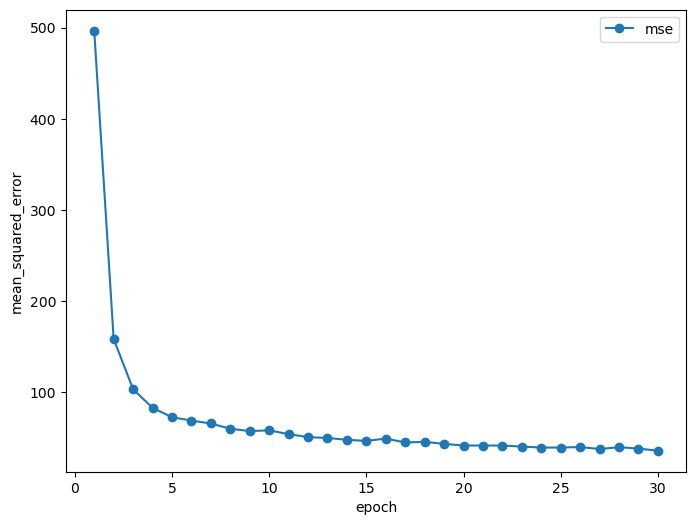

In [22]:
# MSE 학습 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
plt.plot(epoch, mse, label='mse', marker='o')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()
# epoch가 진행될수록 MSE가 감소하는 것을 확인할 수 있다.

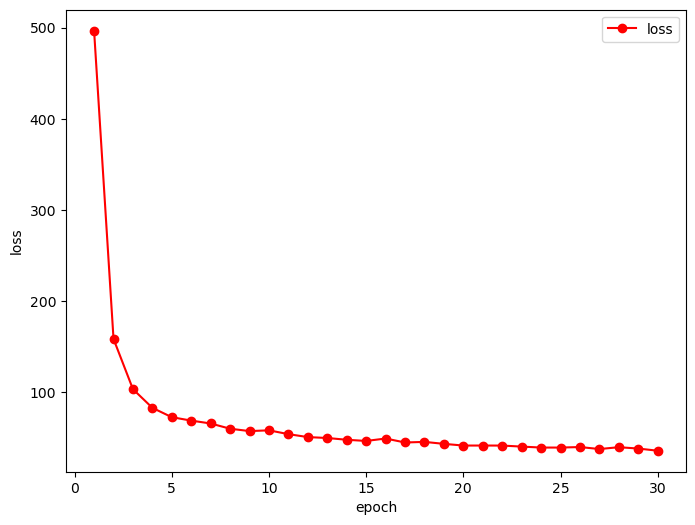

In [15]:
# 손실 그래프
plt.figure(figsize=[8, 6])
plt.plot(epoch, loss, 'r', marker='o', label='loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
# 손실 확인 결과 에포크 진행 단계별로 손실이 점차 낮아지는 것을 볼 수 있다.

In [16]:
# 실제값, 예측값 데이터프레임 생성
pred_y = model.predict(X_te).flatten()
print(pred_y)

4/4 [==============================] - 0s 3ms/step
[15.329386  19.622469  26.157219  10.939337  17.182837  22.884567
 16.984604  24.878834  15.895477   7.102661   2.6577458  8.858372
 15.352566   5.0348144 29.94111   24.588402  18.551605  29.013939
 24.345524  23.073204  24.671417  17.704113  19.521473  28.205599
 21.522345  16.193083  20.91839    9.32741   28.108227  16.926685
 13.770897  16.959879  21.763783  22.606436  24.89393   16.282322
  6.675758  20.322157  12.986964  11.703323  21.036488  18.819006
 13.9262085 11.873838  16.15194   24.505932  17.354565  15.0115185
  9.235289  22.983812   5.4276404 13.944191  21.136024  24.914593
  8.03378   16.738258  19.18687   13.254412  10.871837  20.482477
 19.670183  20.434782  26.025723  24.88818   14.084625  24.499632
 13.359079  16.177877  15.633792  20.777733  18.139442  19.180717
 28.742538  26.189034  21.247658   2.4195876 28.012661  22.112173
 23.553875  18.773434  24.528498  20.200579  17.621742  29.161915
 29.071291  23.624714  2

In [17]:
import pandas as pd
result_df = pd.DataFrame(pred_y, columns=['predict_val'])
result_df['real_val'] = y_te
result_df

,predict_val,real_val
0,15.329386,22.6
1,19.622469,50.0
2,26.157219,23.0
3,10.939337,8.3
4,17.182837,21.2
...,...,...
122,18.196510,19.4
123,19.728901,21.2
124,23.709326,20.3
125,19.999525,18.8


In [26]:
# 예측값을 기준으로 데이터프레임을 오름차순으로 정렬한다.
df_sort = result_df.sort_values(['predict_val'], ascending=True)
df_sort

,predict_val,real_val
96,-0.754135,13.8
116,2.007982,8.4
75,2.419588,7.4
10,2.657746,8.8
13,5.034814,10.5
...,...,...
84,29.071291,50.0
83,29.161915,44.8
14,29.941111,50.0
126,32.776333,33.4


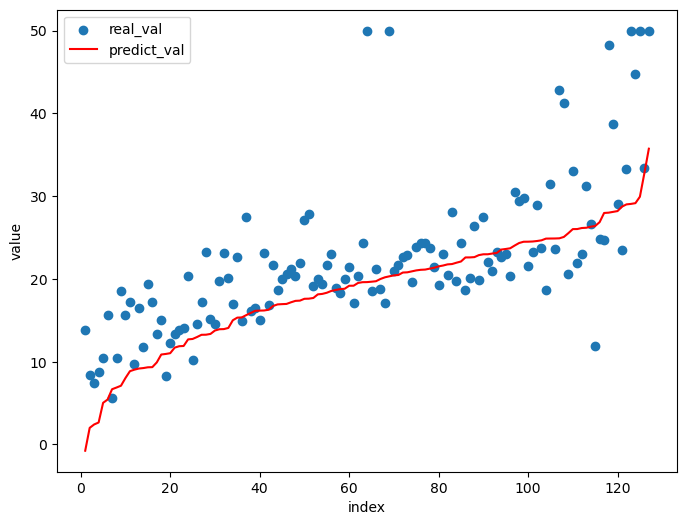

In [30]:
# 예측값, 실제값 비교 그래프
import matplotlib.pyplot as plt
plt.figure(figsize=[8, 6])
idx = np.arange(1, len(df_sort) + 1)
plt.scatter(idx, df_sort['real_val'], marker='o', label='real_val')
plt.plot(idx, df_sort['predict_val'], color='r', label='predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()